In [20]:
# =============================================
# 1. Imports and Setup
# =============================================
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import models, layers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.model_selection import train_test_split

# Set random seeds for reproducibility
np.random.seed(1337)
tf.random.set_seed(1337)

# =============================================
# 2. Load and Preprocess MNIST Data
# =============================================
# Load MNIST dataset (60,000 training images and 10,000 test images)
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize pixel values to the range [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test  = x_test.astype('float32') / 255.0

# Split the training set into training and validation sets (80-20 split)
x_train, x_val, y_train, y_val = train_test_split(
    x_train, y_train,
    test_size=0.2,
    random_state=42,
    stratify=y_train
)

# =============================================
# 3. Reshape Data for a Fully Connected ANN
# =============================================
# For an ANN, we flatten each image from 28x28 to a 784-dimensional vector.
x_train = x_train.reshape(-1, 28 * 28)
x_val   = x_val.reshape(-1, 28 * 28)
x_test  = x_test.reshape(-1, 28 * 28)

# =============================================
# 4. Build the Model
# =============================================
model = models.Sequential([
    layers.Input(shape=(28 * 28,)),       # Expect 784-dimensional input
    layers.Dense(128, activation='relu'),  # Hidden layer with 128 neurons + ReLU activation
    layers.Dropout(0.2),                   # Dropout with a rate of 0.2 (20%)
    layers.Dense(10)                       # Output layer with 10 neurons (one per class), outputs logits
])

# =============================================
# 5. Compile the Model
# =============================================
# Use Adam optimizer and SparseCategoricalCrossentropy loss.
model.compile(
    optimizer=Adam(learning_rate=1e-3),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

# Print the model summary for verification
# model.summary()

In [21]:
# =============================================
# 6. Define Callbacks
# =============================================
# EarlyStopping: stop training if validation loss doesn't improve for 3 consecutive epochs.
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# ModelCheckpoint: save the best model; note the .keras extension (recommended in Keras 3.x).
checkpoint = ModelCheckpoint(filepath='/Users/sameerkhan/Desktop/sameerkhanAIData/computerVision/image_ann_model.keras', monitor='val_loss', save_best_only=True)

# =============================================
# 7. Train the Model with Callbacks
# =============================================
history = model.fit(
    x_train, y_train,
    batch_size=64,
    epochs=20,
    validation_data=(x_val, y_val),
    callbacks=[early_stop, checkpoint]
)

Epoch 1/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.8005 - loss: 0.6539 - val_accuracy: 0.9115 - val_loss: 0.3104
Epoch 2/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.8951 - loss: 0.3672 - val_accuracy: 0.9158 - val_loss: 0.3044
Epoch 3/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.8976 - loss: 0.3675 - val_accuracy: 0.9167 - val_loss: 0.3054
Epoch 4/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.8941 - loss: 0.3810 - val_accuracy: 0.9155 - val_loss: 0.3114
Epoch 5/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.8949 - loss: 0.3820 - val_accuracy: 0.9160 - val_loss: 0.3072


In [22]:

# =============================================
# 8. Evaluate the Model on the Test Set
# =============================================
loss_value, accuracy_value = model.evaluate(x_test, y_test)
print(f"Test Loss: {loss_value:.4f}, Test Accuracy: {accuracy_value:.4f}")

# =============================================
# 9. Visualize Predictions
# =============================================
# Obtain predictions on the test set
predictions = model.predict(x_test)
predicted_labels = np.argmax(predictions, axis=1)

# # Plot the first 25 test images with predicted and true labels
# plt.figure(figsize=(10, 10))
# for i in range(25):
#     plt.subplot(5, 5, i+1)
#     plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
#     plt.title(f"Pred: {predicted_labels[i]}\nTrue: {y_test[i]}")
#     plt.axis('off')
# plt.tight_layout()
# plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9067 - loss: 0.3194
Test Loss: 0.2912, Test Accuracy: 0.9181
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [23]:
predictions

array([[ -0.18884467, -10.44072   ,   1.8865817 , ...,  13.554233  ,
          1.9709867 ,   5.4973927 ],
       [  8.703362  ,   2.0144966 ,  16.188452  , ..., -18.649458  ,
          6.7757087 , -12.6339855 ],
       [ -5.3783627 ,   7.3031387 ,   2.5474176 , ...,   0.8343322 ,
          1.9265169 ,  -0.19728237],
       ...,
       [-11.067013  ,  -7.8051405 ,  -2.9391246 , ...,   3.6926908 ,
          4.531146  ,   7.392952  ],
       [ -0.5668545 ,  -2.9113436 ,  -2.3593175 , ...,  -1.4179054 ,
          8.257904  ,  -1.8223528 ],
       [  4.8026705 ,  -9.36059   ,   4.894897  , ..., -11.253532  ,
         -0.346811  ,  -5.473096  ]], dtype=float32)

In [24]:
predicted_labels

array([7, 2, 1, ..., 4, 5, 6])

In [25]:
# =============================================
# 10. Save the Model
# =============================================
model.save("/Users/sameerkhan/Desktop/sameerkhanAIData/computerVision/image_ann_model.h5")
print("Model saved as 'image_ann_model.h5'.")

Model saved as 'image_ann_model.h5'.


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,772 (397.55 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
predictedlabels [7 2 1 ... 4 5 6]
First 10 Predicted Labels: [7 2 1 0 4 1 4 9 6 9]
First 10 True Labels: [7 2 1 0 4 1 4 9 5 9]


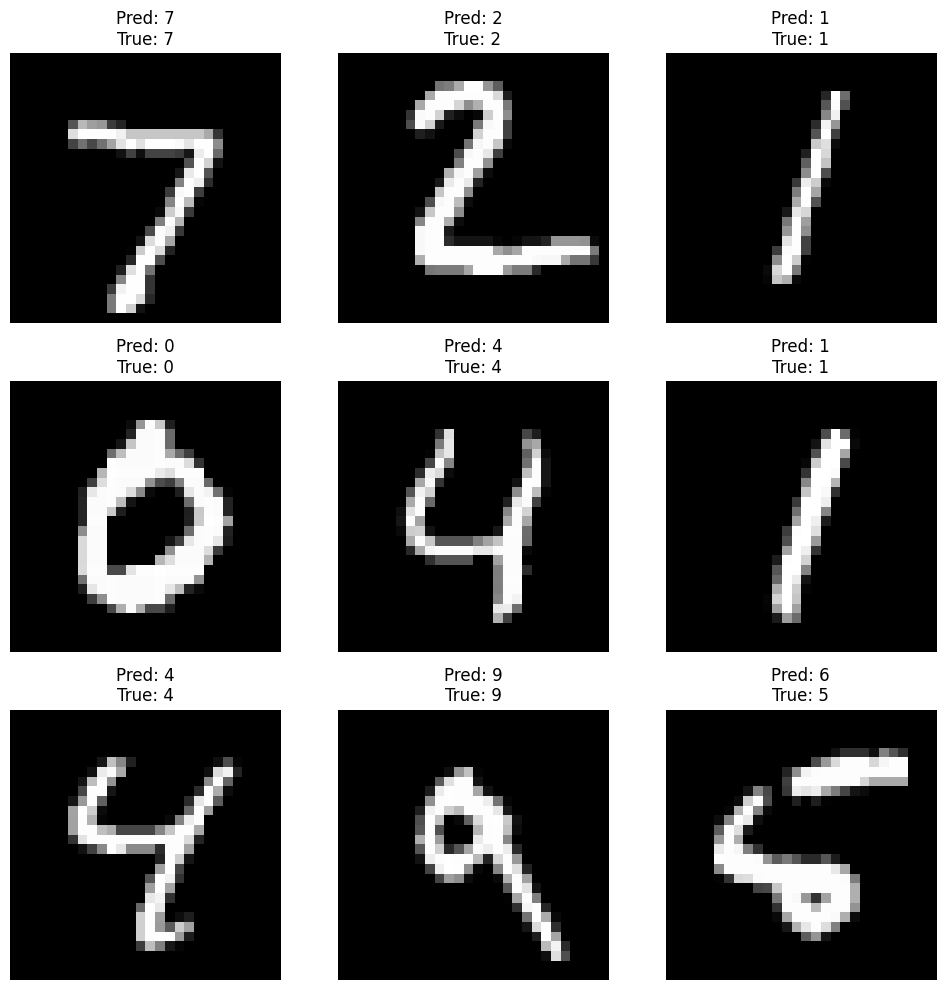

In [26]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# ------------------------------
# 1. Load the Saved Model
# ------------------------------
# This assumes that you saved your model using model.save("mnist_ann_model.h5")
loaded_model = tf.keras.models.load_model("/Users/sameerkhan/Desktop/sameerkhanAIData/computerVision/image_ann_model.h5")
loaded_model.summary()  # Verify that the model structure loads correctly

# ------------------------------
# 2. Prepare Data for Prediction
# ------------------------------
# For demonstration, we'll load the MNIST dataset again.
# In practice, you would load your own test data.
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize the test images (if you normalized training data similarly during training)
x_test = x_test.astype("float32") / 255.0

# If the model was built for a fully-connected network, flatten the images.
# (Our example model expects a 784-dimensional vector.)
x_test_flat = x_test.reshape(-1, 28 * 28)

# ------------------------------
# 3. Make Predictions
# ------------------------------
# Use the loaded model to predict on the test set.
predictions = loaded_model.predict(x_test_flat)

# Since our output layer produces logits and we use SparseCategoricalCrossentropy with from_logits=True,
# convert logits to predicted class labels using argmax.
predicted_labels = np.argmax(predictions, axis=1)
print("predictedlabels",predicted_labels)
# ------------------------------
# 4. Evaluate Predictions (Optional)
# ------------------------------
# Print the first 10 predicted and true labels for quick inspection.
print("First 10 Predicted Labels:", predicted_labels[:10])
print("First 10 True Labels:", y_test[:10])

# ------------------------------
# 5. Visualize Some Predictions
# ------------------------------
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(x_test[i], cmap='gray')
    plt.title(f"Pred: {predicted_labels[i]}\nTrue: {y_test[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()